# Episode 12. Cleanup Data With Pandas

## Part 1. Read Data

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import Data
# Original Data Source - Home mortgage Disclosure Act Data (Delaware, 2017)
# https://www.consumerfinance.gov/data-research/hmda/historic-data/

from google.colab import files
uploaded = files.upload()

Saving hmda_2017_de_all-records_labels.csv to hmda_2017_de_all-records_labels.csv


In [ ]:
# Store data in DataFrame
df = pd.read_csv("hmda_2017_de_all-records_labels.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Part 2. Explore Data

In [ ]:
# shape of data
df.shape

(49695, 78)

In [ ]:
# column names
df.keys()

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [ ]:
df.head(5)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,75-2921540,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,331,Not applicable,3,Application withdrawn by applicant,4,"Salisbury - MD, DE",41540.0,Delaware,DE,10,Sussex County,5.0,511.01,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,77.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,666.0,0.000000,65500.0,262.649994,298.0,1372.0,NaN
1,2017,7197000003,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,94,Preapproval was not requested,2,Application denied by financial institution,3,"Salisbury - MD, DE",41540.0,Delaware,DE,10,Sussex County,5.0,519.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,No co-applicant,5,19.0,Loan was not originated or was not sold in cal...,0,Debt-to-income ratio,1.0,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4483.0,20.320000,65500.0,96.750000,1112.0,1671.0,NaN
2,2017,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,216,Not applicable,3,Loan originated,1,Dover - DE,20100.0,Delaware,DE,10,Kent County,1.0,422.01,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,No co-applicant,5,70.0,Fannie Mae (FNMA),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,10556.0,39.950001,65000.0,111.169998,2373.0,3883.0,NaN
3,2017,54-1094297,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Not owner-occupied as a principal dwelling,2,137,Not applicable,3,Loan originated,1,NaN,NaN,Delaware,DE,10,NaN,NaN,NaN,Not Hispanic or Latino,2,Not Hispanic or Latino,2,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,276.0,"Commercial bank, savings bank or savings assoc...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA lo

In [ ]:
# check data types
df.dtypes

as_of_year                          int64
respondent_id                      object
agency_name                        object
agency_abbr                        object
agency_code                         int64
                                   ...   
hud_median_family_income          float64
tract_to_msamd_income             float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
application_date_indicator        float64
Length: 78, dtype: object

In [ ]:
# summary statistics
df.describe()

,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,state_code,county_code,census_tract_number,applicant_ethnicity,co_applicant_ethnicity,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_sex,co_applicant_sex,applicant_income_000s,purchaser_type,denial_reason_1,denial_reason_2,denial_reason_3,rate_spread,hoepa_status,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
count,49695.0,49695.000000,49695.000000,49695.000000,49695.000000,49695.000000,49695.000000,49695.000000,49695.000000,49466.000000,49695.0,49569.000000,49480.000000,49695.000000,49695.000000,49695.000000,339.000000,22.000000,2.0,2.0,49695.000000,100.000000,8.000000,2.0,2.0,49695.000000,49695.000000,41784.000000,49695.000000,4876.000000,936.000000,116.000000,1835.000000,49695.000000,49695.000000,0.0,0.0,0.0,49480.000000,49480.000000,49480.000000,49480.000000,49480.000000,49480.000000,0.0
mean,2017.0,6.949613,1.541865,1.055901,1.814086,1.139270,236.625415,2.841453,2.683328,41251.589698,10.0,3.244023,300.421052,2.305363,3.808653,4.950458,4.283186,4.409091,4.0,5.0,6.710715,4.440000,4.000000,4.0,5.0,1.780360,3.725264,108.571582,1.766536,3.845570,4.226496,5.206897,2.328687,1.999839,1.609921,NaN,NaN,NaN,5509.423040,31.065304,73457.251415,108.180865,1549.341593,2196.106225,NaN
std,0.0,2.071584,0.809011,0.235528,0.942135,0.353308,1789.233413,0.414934,1.931273,10610.570892,0.0,1.384459,176.638192,0.728333,1.378353,1.230556,1.118450,1.259595,0.0,0.0,1.581293,0.956847,1.069045,0.0,0.0,1.010506,1.497667,727.626354,2.467739,2.439366,2.634202,2.500495,1.394774,0.012687,1.154811,NaN,NaN,NaN,2779.048489,18.468178,8045.438144,30.811210,796.823270,1044.649521,NaN
min,2017.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20100.000000,10.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0,5.0,1.000000,2.000000,3.000000,4.0,5.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000,NaN,NaN,NaN,637.000000,0.000000,65000.000000,13.360000,2.000000,471.000000,NaN
25%,2017.0,7.000000,1.000000,1.000000,1.000000,1.000000,133.000000,3.000000,1.000000,41540.000000,10.0,3.000000,142.000000,2.000000,2.000000,5.000000,3.000000,5.000000,4.0,5.0,5.000000,4.000000,3.000000,4.0,5.0,1.000000,2.000000,50.000000,0.000000,2.000000,3.000000,3.000000,1.630000,2.000000,1.000000,NaN,NaN,NaN,3777.000000,16.959999,65500.000000,88.669998,1040.000000,1525.000000,NaN
50%,2017.0,7.000000,1.000000,1.000000,1.000000,1.000000,196.000000,3.000000,2.000000,48864.000000,10.0,3.000000,168.040000,2.000000,5.000000,5.000000,5.000000,5.000000,4.0,5.0,8.000000,5.000000,4.000000,4.0,5.0,1.000000,5.000000,75.000000,1.000000,3.000000,3.000000,5.000000,1.780000,2.000000,1.000000,NaN,NaN,NaN,4944.000000,28.250000,81400.000000,106.070000,1416.000000,1964.000000,NaN
75%,2017.0,9.000000,2.000000,1.000000,3.000000,1.000000,271.000000,3.000000,4.000000,48864.000000,10.0,5.000000,504.080000,2.000000,5.000000,5.000000,5.000000,5.000000,4.0,5.0,8.000000,5.000000,5.000000,4.0,5.0,2.000000,5.000000,120.000000,2.000000,5.000000,6.000000,7.000000,2.270000,2.000000,1.000000,NaN,NaN,NaN,6581.000000,40.040001,81400.000000,123.440002,1994.000000,2589.000000,NaN
max,2017.0,9.000000,4.000000,3.000000,3.000000,3.000000,300000.000000,3.000000,6.000000,48864.000000,10.0,5.000000,519.000000,4.000000,5.000000,7.000000,5.000000,5.000000,4.0,5.0,8.000000,5.000000,5.000000,4.0,5.0,4.000000,5.000000,107000.000000,9.000000,9.000000,9.000000,9.000000,8.490000,2.000000,4.000000,NaN,NaN,NaN,14528.000000,98.540001,81400.000000,262.649994,4228.000000,5393.000000,NaN


## Part 3. Choose & Rename Variables (Columns)

### 1. Rename columns

In [ ]:
# put all columns name to lower case, then replace ' ' with '_'
df.columns = df.columns.str.lower().str.replace(' ','_')
df.keys()

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

### 2. Drop Columns

In [ ]:
drop_columns = ['respondent_id']
df.drop(drop_columns, axis=1, inplace=True)
df.keys()

Index(['as_of_year', 'agency_name', 'agency_abbr', 'agency_code',
       'loan_type_name', 'loan_type', 'property_type_name', 'property_type',
       'loan_purpose_name', 'loan_purpose', 'owner_occupancy_name',
       'owner_occupancy', 'loan_amount_000s', 'preapproval_name',
       'preapproval', 'action_taken_name', 'action_taken', 'msamd_name',
       'msamd', 'state_name', 'state_abbr', 'state_code', 'county_name',
       'county_code', 'census_tract_number', 'applicant_ethnicity_name',
       'applicant_ethnicity', 'co_applicant_ethnicity_name',
       'co_applicant_ethnicity', 'applicant_race_name_1', 'applicant_race_1',
       'applicant_race_name_2', 'applicant_race_2', 'applicant_race_name_3',
       'applicant_race_3', 'applicant_race_name_4', 'applicant_race_4',
       'applicant_race_name_5', 'applicant_race_5', 'co_applicant_race_name_1',
       'co_applicant_race_1', 'co_applicant_race_name_2',
       'co_applicant_race_2', 'co_applicant_race_name_3',
       'co_applicant

### 3. keep columns

In [ ]:
keep_columns = ['loan_purpose_name','loan_type_name','applicant_race_name_1','action_taken_name','applicant_sex_name','applicant_income_000s','population','minority_population','hud_median_family_income']
df = df[keep_columns]
df.keys()

Index(['loan_purpose_name', 'loan_type_name', 'applicant_race_name_1',
       'action_taken_name', 'applicant_sex_name', 'applicant_income_000s',
       'population', 'minority_population', 'hud_median_family_income'],
      dtype='object')

## Part 4. Handling Missing Data

### 1. Find Missing Data

In [ ]:
# find missing data
df.isna()

,loan_purpose_name,loan_type_name,applicant_race_name_1,action_taken_name,applicant_sex_name,applicant_income_000s,population,minority_population,hud_median_family_income
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
49690,False,False,False,False,False,True,False,False,False
49691,False,False,False,False,False,True,False,False,False
49692,False,False,False,False,False,True,False,False,False
49693,False,False,False,False,False,True,False,False,False


In [ ]:
# number of missing data by columns
df.isna().sum()

loan_purpose_name              0
loan_type_name                 0
applicant_race_name_1          0
action_taken_name              0
applicant_sex_name             0
applicant_income_000s       7911
population                   215
minority_population          215
hud_median_family_income     215
dtype: int64

In [ ]:
# total number of missing data
df.isna().sum().sum()

8556

### 2. Handle Missing Data

In [ ]:
# Method 1. drop missing data
drop_df = df.dropna(how='any')
drop_df.shape

(41581, 9)

In [ ]:
# Method 2. fill all the NA/NaNs with some fixed value, for example 0
fill_df = df
fill_df.fillna(value=0, inplace = True) 

In [ ]:
# Method 3. fill missing for selected columns with zero (or other numbers)
partialfill_df = df
partialfill_df[['applicant_income_000s', 'population']] = df[['applicant_income_000s', 'population']].fillna(value=0)


In [ ]:
# Method 4. missing data for columns with ‘object’ dtypes
obj_df = df
obj_df['loan_purpose_name'].fillna("missing information", inplace=True)

In [ ]:
# Method 5. ffill & bfill
# ffill - propagates last valid observation to the next
# bfill - uses next observation to fill gap
ffillobj_df = df
ffillobj_df['loan_purpose_name'].fillna(method='ffill', inplace=True)

In [ ]:
# Method 6. use the mean of the column to fill the missing values
mean_df = df
mean_df['applicant_income_000s'].fillna(mean_df['applicant_income_000s'].mean(), inplace=True)

In [ ]:
# for this exercise, let's use Method 1 (drop all missing)
df = drop_df
df.shape

(41581, 9)

## Part 5. Duplicate Data

In [ ]:
# Find Duplicate Data
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(1760, 9)

In [ ]:
# duplicate data for individual column
duplicated_rows_df_income = df[df.duplicated(['applicant_income_000s'])]
duplicated_rows_df_income.shape

(40800, 9)

In [ ]:
# alternative method to check duplicate data
len(df.applicant_income_000s.unique())

781

In [ ]:
# drop duplicate data
df.drop_duplicates().shape 

(39821, 9)

## Part 6. Create Bins

In [ ]:
# Based on the score [0.,30.,100.,250.], I want to put movies in different buckets [‘poor’, ‘average’, ‘rich’]. 
# As you can understand movies with score between 0–4 will be put into the ‘poor’ bucket and so on.
op_labels = ['poor', 'average', 'rich']
category = [0.,30.,100.,250.]
df['wealth_level'] = pd.cut(df['applicant_income_000s'], labels=op_labels, bins=category, include_lowest=False)
# Check bin data
print(df[['applicant_income_000s', 'wealth_level']][209:220])

     applicant_income_000s wealth_level
261                   41.0      average
263                   22.0         poor
265                  210.0         rich
266                  144.0         rich
267                   73.0      average
269                  148.0         rich
271                   67.0      average
272                  150.0         rich
273                   80.0      average
275                  140.0         rich
276                   45.0      average


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Part 7. Detect Outliers

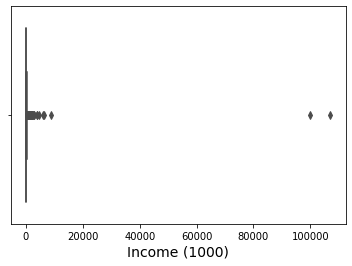

In [ ]:
# Box Plots
sns.boxplot(x=df['applicant_income_000s'], color='lime')
plt.xlabel('Income (1000)', fontsize=14)
plt.show()

In [ ]:
# check maximum income
print(df[['applicant_income_000s']].iloc[df['applicant_income_000s'].idxmax()])

applicant_income_000s    50.0
Name: 1734, dtype: float64


In [ ]:
# summary statistics
print(df['applicant_income_000s'].describe())

count     41581.000000
mean        108.779587
std         729.371437
min           1.000000
25%          50.000000
50%          76.000000
75%         120.000000
max      107000.000000
Name: applicant_income_000s, dtype: float64


## Part 8. Keep Only Numeric Data

In [ ]:
# check data types
df.dtypes

loan_purpose_name             object
loan_type_name                object
applicant_race_name_1         object
action_taken_name             object
applicant_sex_name            object
applicant_income_000s        float64
population                   float64
minority_population          float64
hud_median_family_income     float64
wealth_level                category
dtype: object

In [ ]:
# Create a new data-frame excluding all the ‘object’ types column
print("shape before :", df.shape)
df_numeric = df.select_dtypes(exclude=['object'])
print("shape after excluding object columns: ", df_numeric.shape)

shape before : (41581, 10)
shape after excluding object columns:  (41581, 5)


## Part 8. Save Data

In [ ]:
# Export as CSV, save on local drive
from google.colab import files
df_numeric.to_csv('hmda_numericonly.csv') 
files.download('hmda_numericonly.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>